In [215]:
import numpy as np
import pandas as pd
from pandas import DataFrame as df
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')
import itertools
from scipy import stats

In [144]:
df=pd.read_csv('Laliga.csv')
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,Champion,Runner-up,Third,Fourth,Fifth,Sixth,T,Debut,Since/LastApp,BestPosition
1,1,Real Madrid,86,4385,2762,1647,552,563,5947,3140,33,23,8,8,3,4,79,1929,1929,1
2,2,Barcelona,86,4262,2762,1581,573,608,5900,3114,25,25,12,12,4,6,83,1929,1929,1
3,3,Atletico Madrid,80,3442,2614,1241,598,775,4534,3309,10,8,16,9,7,6,56,1929,2002-03,1
4,4,Valencia,82,3386,2664,1187,616,861,4398,3469,6,6,10,11,10,7,50,1931-32,1987-88,1


In [148]:
c=df.iloc[0].values
df.columns=c
df1=df.iloc[1:]
df1.head()

,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,Champion,Runner-up,Third,Fourth,Fifth,Sixth,T,Debut,Since/LastApp,BestPosition
1,1,Real Madrid,86,4385,2762,1647,552,563,5947,3140,33,23,8,8,3,4,79,1929,1929,1
2,2,Barcelona,86,4262,2762,1581,573,608,5900,3114,25,25,12,12,4,6,83,1929,1929,1
3,3,Atletico Madrid,80,3442,2614,1241,598,775,4534,3309,10,8,16,9,7,6,56,1929,2002-03,1
4,4,Valencia,82,3386,2664,1187,616,861,4398,3469,6,6,10,11,10,7,50,1931-32,1987-88,1
5,5,Athletic Bilbao,86,3368,2762,1209,633,920,4631,3700,8,7,10,5,8,10,49,1929,1929,1


## 1.	Which are the teams which started playing between 1930-1980?

In [149]:
df1['Debut'].values

array(['1929', '1929', '1929', '1931-32', '1929', '1934-35', '1929',
       '1929', '1939-40', '1932-33', '1941-42', '1939-40', '1948-49',
       '1929', '1944-45', '1935-36', '1949-50', '1933-34', '1960-61',
       '1951-52', '1998-99', '1941-42', '1977-78', '1959-60', '2004-05',
       '1935-36', '1961-62', '1940-41', '1930-31', '1963-64', '1974-75',
       '1943-44', '1977-78', '1987-88', '1941-42', '1991-92', '2007-08',
       '1962-63', '1994-95', '1978-79', '1971-72', '1963-64', '1999-00',
       '2014-15', '1929', '1990-91', '1947-48', '1996-97', '1995-96',
       '1945-46', '1953-54', '1929', '1979-80', '1929', '1950-51',
       '2016-17', '2009-10', '1956-57', '1951-52', '1955-56', '2017-18'],
      dtype=object)

In [152]:
j=0
for i in df1['Debut'].values:
    df1['Debut'][j]=i[:4]
    j+=1
df1['Debut']=df1['Debut'].astype(int)
df1['Debut'].values

array([1931, 1929, 1934, 1929, 1929, 1939, 1932, 1941, 1939, 1948, 1929,
       1944, 1935, 1949, 1933, 1960, 1951, 1998, 1941, 1977, 1959, 2004,
       1935, 1961, 1940, 1930, 1963, 1974, 1943, 1977, 1987, 1941, 1991,
       2007, 1962, 1994, 1978, 1971, 1963, 1999, 2014, 1929, 1990, 1947,
       1996, 1995, 1945, 1953, 1929, 1979, 1929, 1950, 2016, 2009, 1956,
       1951, 1955, 2017, 2017, 1929, 1929])

In [76]:
list(df1[(df1['Debut']>1930) | (df1['Debut']<1980)]['Team'].values)

['Real Madrid',
 'Barcelona',
 'Atletico Madrid',
 'Valencia',
 'Athletic Bilbao',
 'Sevilla',
 'Espanyol',
 'Real Sociedad',
 'Zaragoza',
 'Real Betis',
 'Deportivo La Coruna',
 'Celta Vigo',
 'Valladolid',
 'Racing Santander',
 'Sporting Gijon',
 'Osasuna',
 'Malaga',
 'Oviedo',
 'Mallorca',
 'Las Palmas',
 'Villarreal',
 'Granada',
 'Rayo Vallecano',
 'Elche',
 'Getafe',
 'Hercules',
 'Tenerife',
 'Murcia',
 'Alaves',
 'Levante',
 'Salamanca',
 'Sabadell',
 'Cadiz',
 'Logrones',
 'Castellon',
 'Albacete',
 'Almeria',
 'Cordoba',
 'Compostela',
 'Recreativo',
 'Burgos CF',
 'Pontevedra',
 'Numancia',
 'Eibar',
 'Arenas',
 'Real Burgos',
 'Gimnastic',
 'Extremadura',
 'Merida',
 'Alcoyano',
 'Jaen',
 'Real Union',
 'AD Almeria',
 'Europa',
 'Lleida',
 'Leganes',
 'Xerez',
 'Condal',
 'Atletico Tetuan',
 'Cultural Leonesa',
 'Girona']

## 2.	Which are the top 5 teams in terms of points?

In [89]:
a=list(df1['Points'].sort_values(ascending=False).head(5).index.values)
df1.iloc[a][['Team','Points']]

,Team,Points
22,Granada,667
47,Gimnastic,91
48,Extremadura,83
49,Merida,81
50,Alcoyano,76


## 3.	What is the distribution of the winning percentage for all teams? Which teams are in the top 5 in terms of winning percentage? (Winning percentage= (GamesWon / GamesPlayed)*100)

In [166]:
df1['GamesPlayed']=df1['GamesPlayed'].replace('-',0)
df1['GamesWon']=df1['GamesWon'].replace('-',0)
df1['GamesWon']=df1['GamesWon'].astype(int)
df1['GamesPlayed']=df1['GamesPlayed'].astype(int)

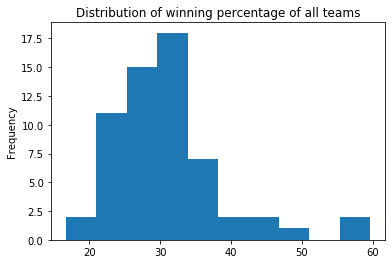

In [171]:
df1['WinPer']=(df1['GamesWon']/df1['GamesPlayed'])*100
df1['WinPer'].plot(kind='hist')
plt.title('Distribution of winning percentage of all teams')
plt.show()

In [202]:
df1['WinPer'].sort_values(ascending=False).head(5)

1    59.630702
2    57.241130
3    47.475134
4    44.557057
5    43.772629
Name: WinPer, dtype: float64

In [200]:
df1[['Team','WinPer']].head(5)

,Team,WinPer
1,Real Madrid,59.630702
2,Barcelona,57.241130
3,Atletico Madrid,47.475134
4,Valencia,44.557057
5,Athletic Bilbao,43.772629


## 4.	Is there a significant difference in the winning percentage for teams which have attained a best position between 1-3 and those teams which have had a best position between 4-7.

In [210]:
df1['BestPosition']=df1['BestPosition'].astype(int)

In [214]:
x=df1[(df1['BestPosition']>=1) & (df1['BestPosition']<=3)]['WinPer']
y=df1[(df1['BestPosition']>=4) & (df1['BestPosition']<=7)]['WinPer']

In [225]:
# Null Hypothesis : There is no significant difference in the winning percentage for teams which have attained a best position between 1-3 and those teams which have had a best position between 4-7
# Alternate Hypothesis  : There is a significant difference in the winning percentage for teams which have attained a best position between 1-3 and those teams which have had a best position between 4-7


print(stats.ttest_ind(x,y))

print('\nHence the p value is less than 0.05 alpha value we can reject the null hypothesis.')
print('\nSo there is a significant difference in the winning percentage for teams which have attained a best position between 1-3 \nand those teams which have had a best position between 4-7')


Ttest_indResult(statistic=4.992715339447283, pvalue=1.5362101870160483e-05)

Hence the p value is less than 0.05 alpha value we can reject the null hypothesis.

So there is a significant difference in the winning percentage for teams which have attained a best position between 1-3 
and those teams which have had a best position between 4-7
